# CORONA DATA ANALYSIS REPORT 

### ***Import the libraries***

In [4]:
import pandas as pd #----Read and analysis the data----#
import plotly.graph_objects as go #----Customize the plot and dashboard----#
from plotly.subplots import make_subplots  #----Customize the plot and dashboard----#
import plotly.express as px #---Create the chart easier----#
import numpy as np #----Handling the analyse value eg-infinite value ----#

###  ***Load the Data Set***

In [6]:
df=pd.read_csv('B:/swees/Excelss/Corona_sheet.csv')

### ***Sample Data***

In [10]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


### ***Check the null values in the columns***

In [13]:
print(df.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


### ***Find the number of rows and columns***

In [16]:
df.shape

(187, 15)

### ***Get the analyze of data set***

In [19]:
print(".............................")
print(df.dtypes)
print("..............................")
print(df.columns)
print("...............................")
print(df.describe)

.............................
Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object
..............................
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')
...............................
<bound method NDFrame.describe of          Country/Region  Confirmed 

### ***Find the total number of countries***

In [22]:
total_countries=df['Country/Region'].nunique()
total_countries

187

### ***Total Confirmed Case***

In [25]:
total_confirm=df['Confirmed'].sum()
print("Total confirm: ",total_confirm)

Total confirm:  16480485


### ***Total Deaths  Case***

In [28]:
total_death=df['Deaths'].sum()
print("Total Deaths :" ,total_death)

Total Deaths : 654036


### ***Total Recovered Case***

In [31]:
recover=df['Recovered'].sum()
print("Total Recovered case  :",recover)

Total Recovered case  : 9468087


### ***Total Active Case***

In [34]:
active_case=df['Active'].sum()
print("Active case:",active_case)

Active case: 6358362


### ***Global Recovery Rate***

In [37]:
global_recovery_rate=recover*100/total_confirm
print("Global Recovery rate :{:.2f}%".format(global_recovery_rate))

Global Recovery rate :57.45%


### ***Global Mortality Rate***

In [40]:
global_mortality_rate=total_death*100/total_confirm
print("Golbal Mortality Rate: {:.2f}%".format(global_mortality_rate))

Golbal Mortality Rate: 3.97%


### ***Total Number of WHO Region***

In [43]:
total_num_WHO_reg=df['WHO Region'].nunique()
print("Total Number of WHO Regions:",total_num_WHO_reg)

Total Number of WHO Regions: 6


### ***Most Affected Countries***

In [46]:
most_affected=df.loc[df['Confirmed'].idxmax(),'Country/Region']
print("Most Affected country by confirmed cases:)",most_affected)

Most Affected country by confirmed cases:) US


### ***Highest Recovery Country***

In [49]:
df['Recovery rate']=df['Recovered']*100/df['Confirmed']
df['Recovery rate'].replace([float('inf')],0) 
df['Recovery rate'].fillna(0)

highest_recovery_rate=df.loc[df['Recovery rate'].idxmax(),'Country/Region']
print("Country with highest recovery rate:" ,highest_recovery_rate)

Country with highest recovery rate: Dominica


###  ***Highest Mortality Region***

In [52]:
df['Mortality rate']=df['Deaths']*100/df['Confirmed']
df['Mortality rate'].replace([float('inf'),float('inf')],0,inplace=True)

highest_mortality_rate=df.loc[df['Mortality rate'].idxmax(),'Country/Region']
print("Country with highest mortality rate:" ,highest_mortality_rate)

Country with highest mortality rate: Yemen


C:\Users\asus\AppData\Local\Temp\ipykernel_6752\3865400807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mortality rate'].replace([float('inf'),float('inf')],0,inplace=True)


### ***Import the wanted libraries***

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# *Charts* 

### ***Bar Graph***

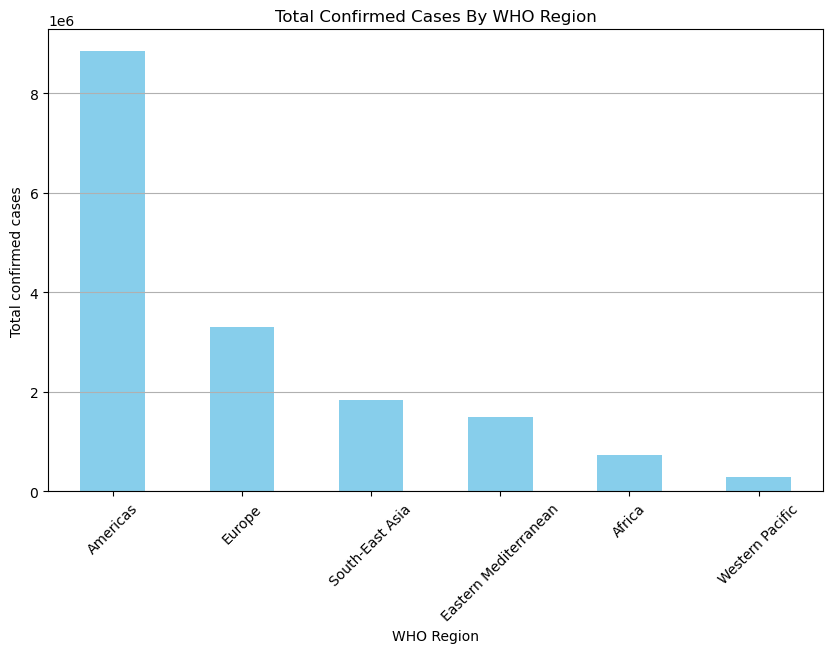

In [55]:
region_confirmed=df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
region_confirmed.plot(kind='bar',color='skyblue')
plt.title("Total Confirmed Cases By WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Total confirmed cases")
plt.xticks(rotation=45)
plt.grid(axis="y")
#plt.tight_layout()
plt.show()

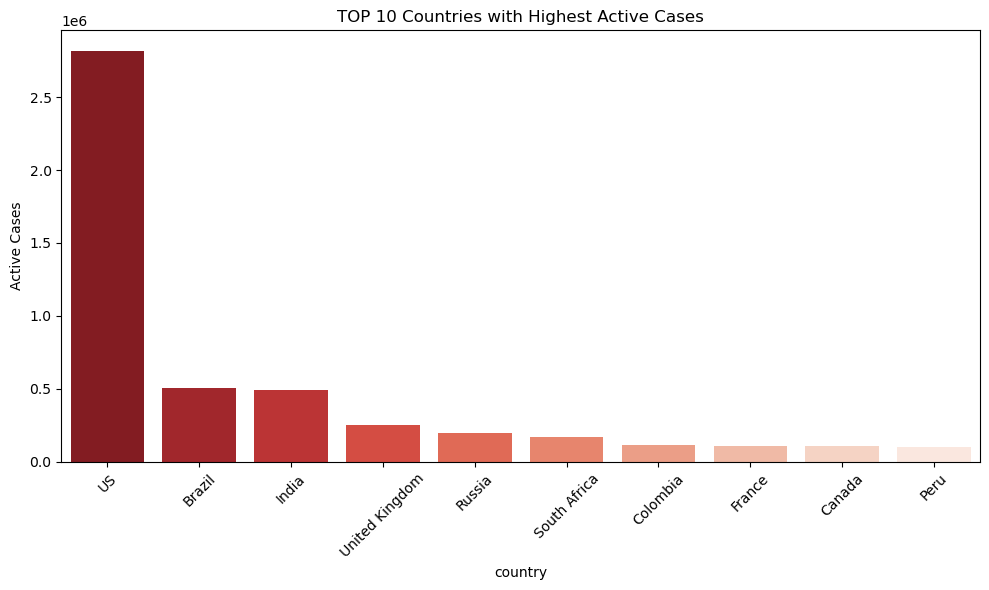

In [56]:
top10_active=df.sort_values(by="Active",ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region',y='Active',hue='Country/Region' ,data=top10_active, palette='Reds_r',legend=False)
plt.title("TOP 10 Countries with Highest Active Cases")
plt.xlabel("country")
plt.ylabel("Active Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***Pie Chart***

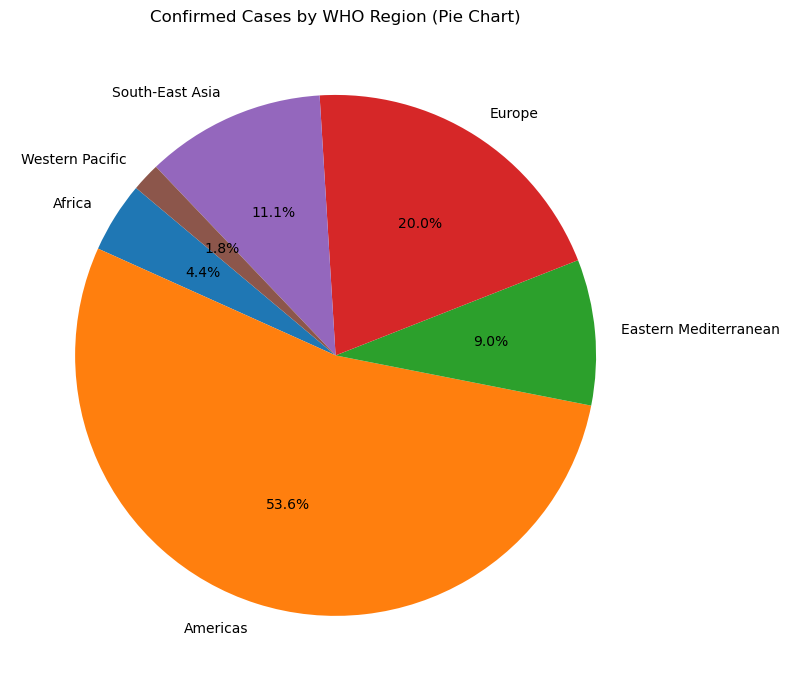

In [60]:
region_cases=df.groupby('WHO Region')['Confirmed'].sum()

plt.figure(figsize=(8,8))
plt.pie(region_cases,labels=region_cases.index,autopct='%1.1f%%',startangle=140)
plt.title("Confirmed Cases by WHO Region (Pie Chart)")
plt.tight_layout()
plt.show()

### ***Scatter Plot***

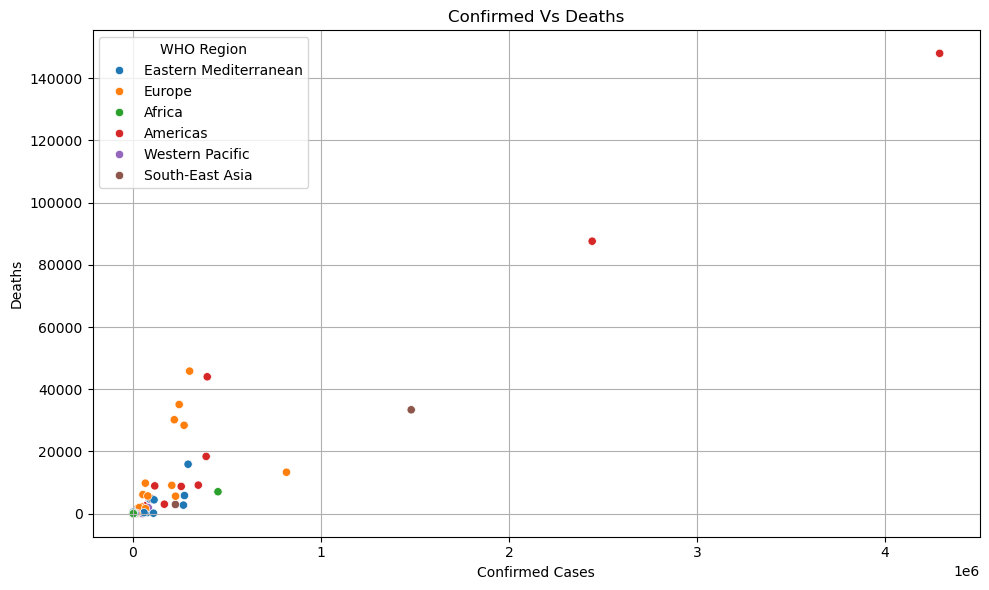

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed',y='Deaths',hue='WHO Region',data=df)
plt.title("Confirmed Vs Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

### ***Heat Map***

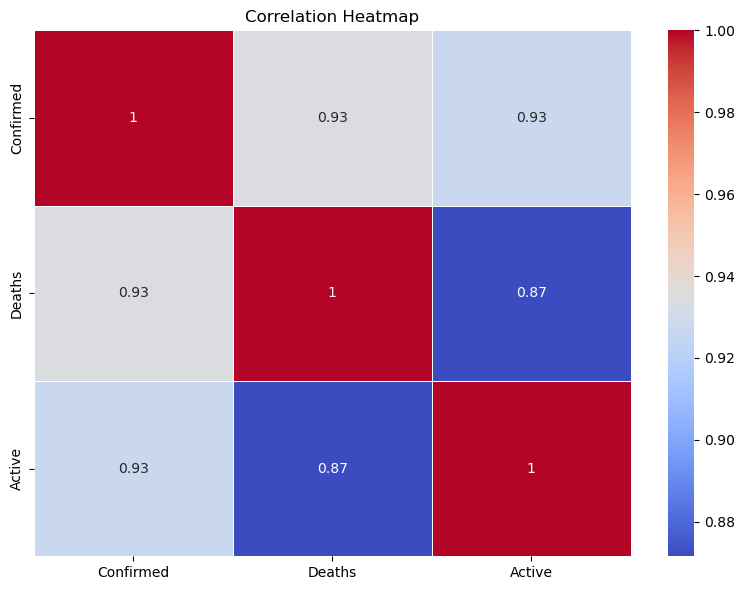

In [64]:
correlation=df[['Confirmed','Deaths','Active']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

### ***Histogram***

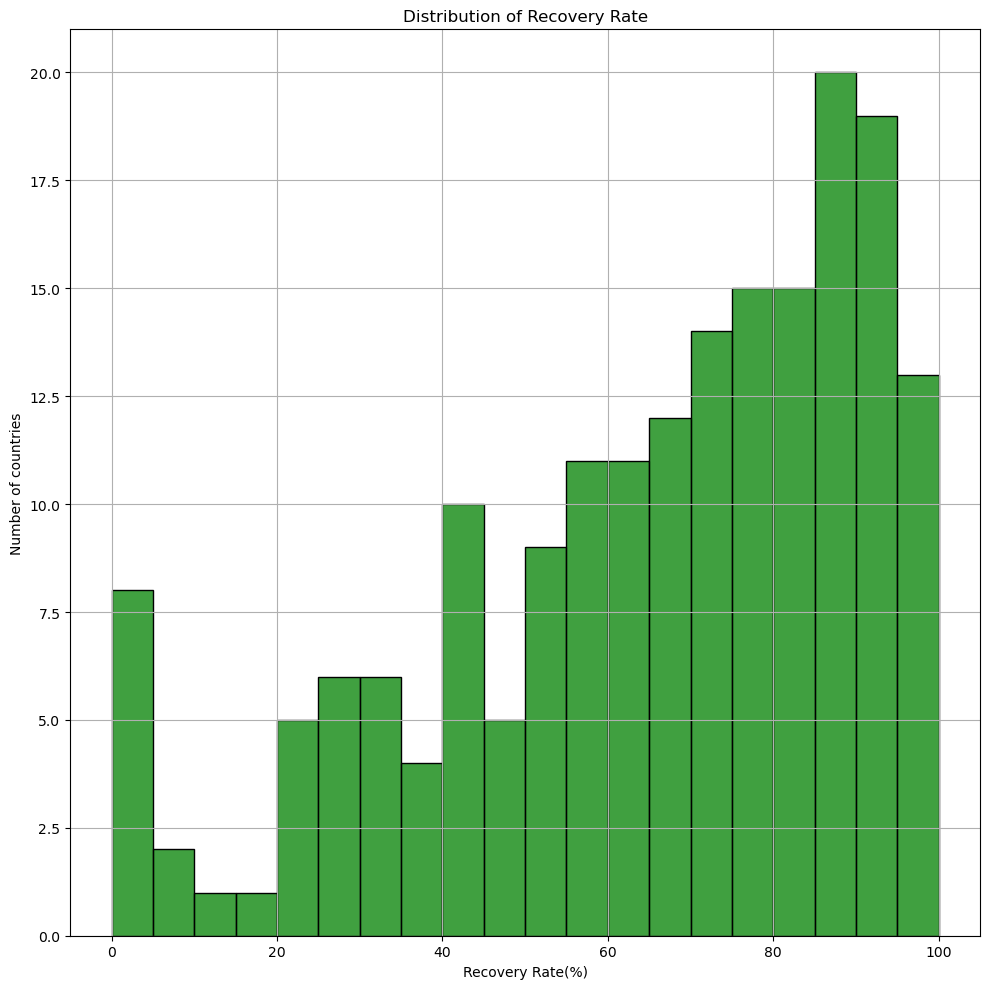

In [66]:
plt.figure(figsize=(10,10))
sns.histplot(df['Recovery rate'],bins=20,color="green")
plt.title("Distribution of Recovery Rate")
plt.xlabel("Recovery Rate(%)")
plt.ylabel("Number of countries")
plt.grid(True)
plt.tight_layout()
plt.show()

### ***Box Plot***

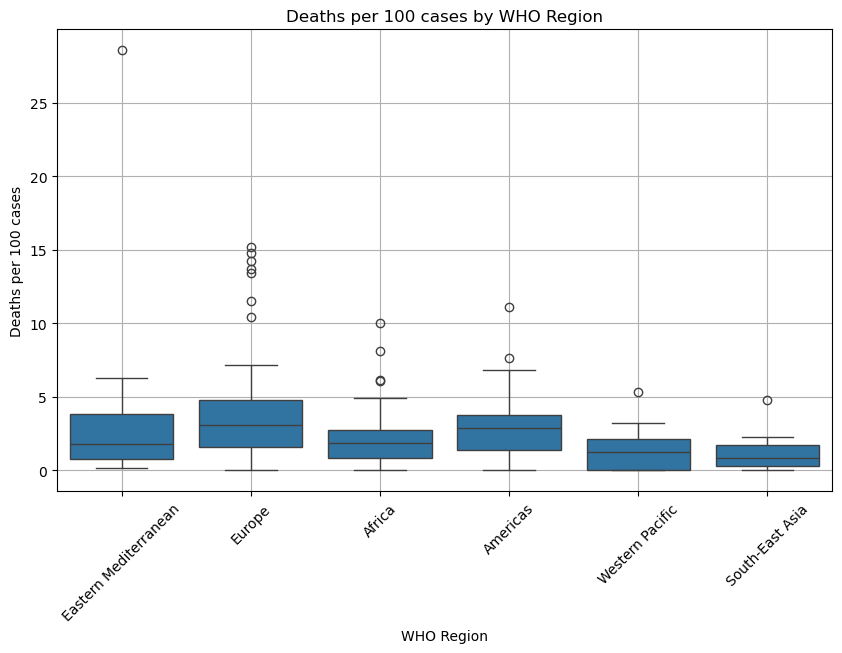

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x='WHO Region',y='Deaths / 100 Cases',data=df)
plt.title("Deaths per 100 cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Deaths per 100 cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.grid(True)

### ***Scatter Plot***

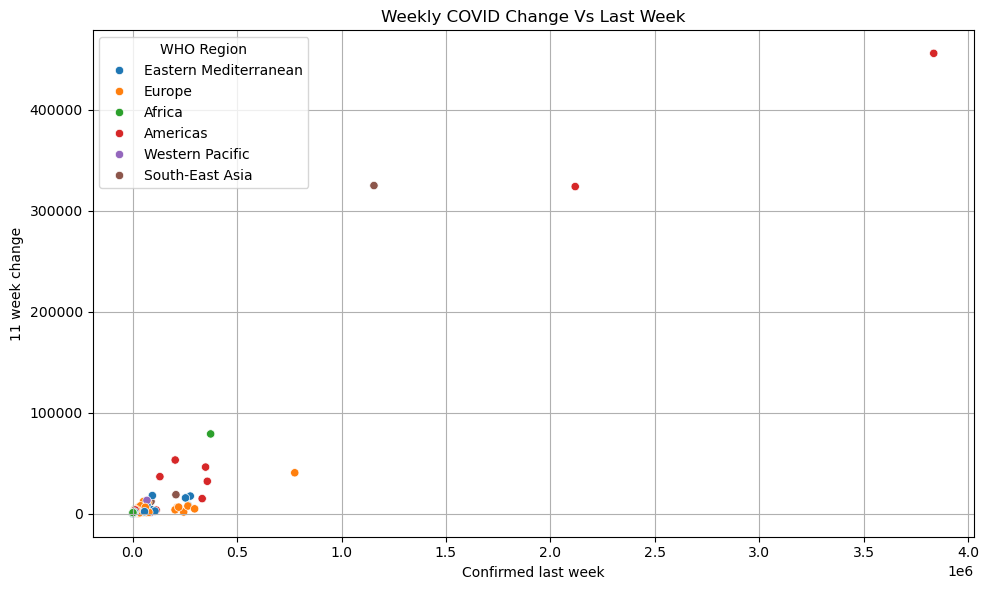

In [70]:
if'Confirmed last week' in df.columns and '1 week change' in df.columns and '1 week change' in df.columns:

    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df,x='Confirmed last week', y='1 week change', hue='WHO Region')
    plt.title("Weekly COVID Change Vs Last Week")
    plt.xlabel('Confirmed last week')
    plt.ylabel('11 week change')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found: 'Confirmed last week' & '1 week change'")

###  ***Violin Plot***

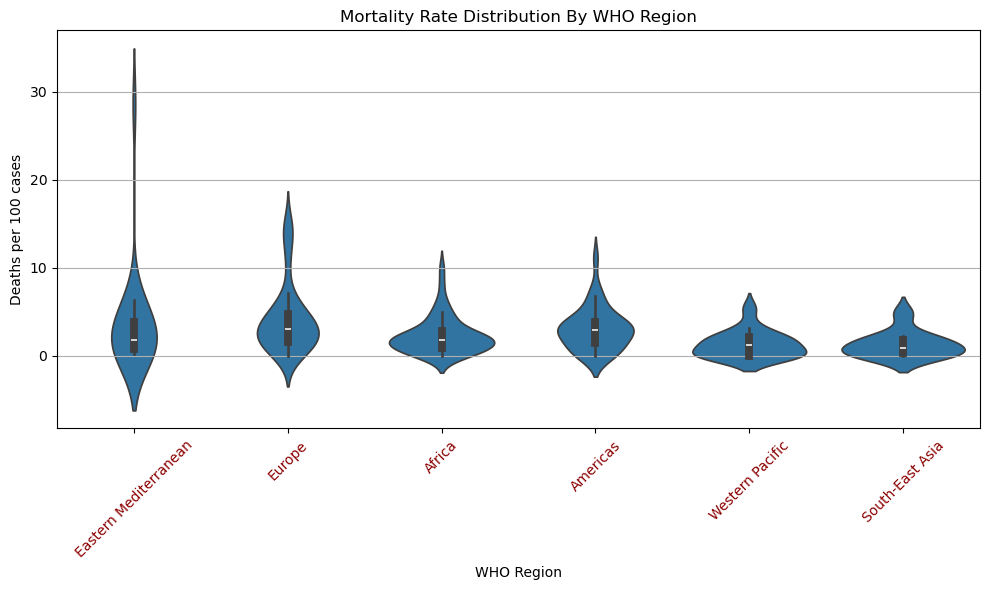

In [72]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='WHO Region', y='Deaths / 100 Cases')
plt.title("Mortality Rate Distribution By WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Deaths per 100 cases")
plt.xticks(rotation=45, color='darkred')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

        

### ***Import the library to create the Dashboard***

In [75]:
!pip install dash
import dash
print("Dash is installed correctly")

Dash is installed correctly


In [85]:
import plotly.express as px
import plotly.graph_objects as go

# Chart 1
chart1 = px.bar(
    df.groupby('WHO Region')['Confirmed'].sum().reset_index(),
    x='WHO Region',
    y='Confirmed',
    title='Total Confirmed Cases by WHO Region'
)

# Chart 2
chart2 = px.bar(
    df.sort_values('Active', ascending=False).head(10),
    x='Country/Region',
    y='Active',
    title='Top 10 Countries with Active Cases'
)


chart3 = px.pie(
    df,
    names="WHO Region",
    values='Confirmed',
    title='Confirmed Cases Distribution by Region'
)


chart4 = px.scatter(
    df,
    x='Confirmed',
    y='Deaths',
    color='WHO Region',
    title='Confirmed Cases vs Deaths'
)


chart5 = px.histogram(
    df,
    x='Recovery rate',
    nbins=20,  # `bins` is not valid for px.histogram — use `nbins`
    title='Recovery Rate Distribution across Countries'
)


chart6 = px.box(
    df,
    x='WHO Region',
    y='Mortality rate',
    title='Mortality Rate by Region'
)


correlation = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
chart7 = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.columns,
    colorscale='viridis'
))

chart8 = px.box(
    df,
    x='WHO Region',
    y='Deaths / 100 Cases',
    title='Deaths per 100 Cases by Region'
)

if 'Confirmed last week' in df.columns and '1 week change' in df.columns:
    chart9 = px.scatter(
        df,
        x='Confirmed last week',
        y='1 week change',
        color='WHO Region',
        title='Weekly Change in Confirmed Cases'
    )
else:
    chart9 = go.Figure()
    chart9.update_layout(title='Weekly Change Data Not Available')

chart10 = px.violin(
    df,
    x='WHO Region',
    y='Mortality rate',
    box=True,
    title='Mortality Rate Violin Plot by Region'
)


In [101]:
from dash import Dash, html,dcc
app=Dash(__name__)

app.layout=html.Div([
    html.H1("COVID 19 Data Dashboard", style={'textAlign':'center'}),

    dcc.Graph(figure=chart1),
     dcc.Graph(figure=chart2),
     dcc.Graph(figure=chart3),
     dcc.Graph(figure=chart4),
     dcc.Graph(figure=chart5),
     dcc.Graph(figure=chart6),
     dcc.Graph(figure=chart7),
     dcc.Graph(figure=chart8),
     dcc.Graph(figure=chart9),
     dcc.Graph(figure=chart10),
    html.P("Built by Swees " ,style={'textalign':'center','marginTop':'20px'})
])

In [107]:
if __name__=='__main__':
    app.run(debug=True)